# Predicting Stock Prices with Different Machine Learning Models

In [1]:
%matplotlib inline

In [29]:
#standard imports for calculations, dataframes work and plotting - check this again
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import seaborn as sns

#holidays handling
from pandas.tseries.offsets import BDay

np.random.seed(2209)

In [3]:
#Reading our data
microsoft_prices = pd.read_csv("microsoft_stock_prices.csv")

Below take a look at the data

### All models are wrong but some are useful! 

In [4]:
microsoft_prices.head()
#explain columns, terminology, time series definition, stocks for sure

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,59.3125,56.00000,58.68750,58.28125,53228400.0,37.623280
1,2000-01-04,58.5625,56.12500,56.78125,56.31250,54119000.0,36.352352
2,2000-01-05,58.1875,54.68750,55.56250,56.90625,64059600.0,36.735657
3,2000-01-06,56.9375,54.18750,56.09375,55.00000,54976600.0,35.505081
4,2000-01-07,56.1250,53.65625,54.31250,55.71875,62013600.0,35.969063


In [5]:
microsoft_prices.shape

(4981, 7)

In [6]:
#Since the date columns is object, we will transform it into a datetime format, before we proceed further
microsoft_prices.Date = pd.to_datetime(microsoft_prices.Date)

In [7]:
#since we don't know if only business days are included we will have to make another check
isBusinessDay = BDay().onOffset
microsoft_business_days_check = pd.to_datetime(microsoft_prices.Date).map(isBusinessDay)
microsoft_business_days_check.shape

(4981,)

In [8]:
microsoft_business_days_check.unique()

array([ True])

In [9]:
microsoft_prices = microsoft_prices.set_index("Date")

In [10]:
#The time series we have downloaded do not include holidays. Years have different count of working days 
#but this is normal because holiday days are on different day every year
microsoft_prices.index.year.value_counts()

2008    253
2000    252
2005    252
2011    252
2004    252
2003    252
2014    252
2010    252
2016    252
2002    252
2015    252
2013    252
2009    252
2017    251
2006    251
2018    251
2007    251
2012    250
2001    248
2019    202
Name: Date, dtype: int64

In [11]:
#microsoft_prices.loc["2010"].count()

In [12]:
microsoft_prices = microsoft_prices.rename(columns = {
    "High": "high", 
    "Low": "low", 
    "Open": "open",
    "Close": "close",
    "Volume": "volume",
    "Adj Close": "adj_close"})

In [13]:
microsoft_prices = microsoft_prices.round({"high":2, "low":2, "open":2, "close":2, "adj_close":2})

In [14]:
microsoft_prices.sample(10)

,high,low,open,close,volume,adj_close
Date,,,,,,
2019-02-22,111.20,109.82,110.05,110.97,27763200.0,110.19
2015-01-29,42.12,40.79,40.93,42.01,63585300.0,37.84
2012-02-08,30.67,30.22,30.26,30.66,49659100.0,25.38
2010-04-23,31.58,30.65,31.12,30.96,126766600.0,24.57
2018-10-01,115.68,114.73,114.75,115.61,18883100.0,113.82
2006-03-27,27.30,27.00,27.01,27.01,59908600.0,19.97
2015-02-24,44.30,43.92,44.15,44.09,25271700.0,40.00
2000-03-09,50.00,47.50,47.66,50.00,88198800.0,32.28
2005-03-09,25.57,25.28,25.39,25.31,62991800.0,18.48


In [15]:
microsoft_prices.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4981 entries, 2000-01-03 to 2019-10-18
Data columns (total 6 columns):
high         4981 non-null float64
low          4981 non-null float64
open         4981 non-null float64
close        4981 non-null float64
volume       4981 non-null float64
adj_close    4981 non-null float64
dtypes: float64(6)
memory usage: 272.4 KB


#### Plot the data to explore it further for trends, seasonality. The data should be stationary for our algorithms. It will be important to remove trends and seasonality before fitting the models.
##### I will then scale the data for more convenience, split it , apply gridcsearch and test models.

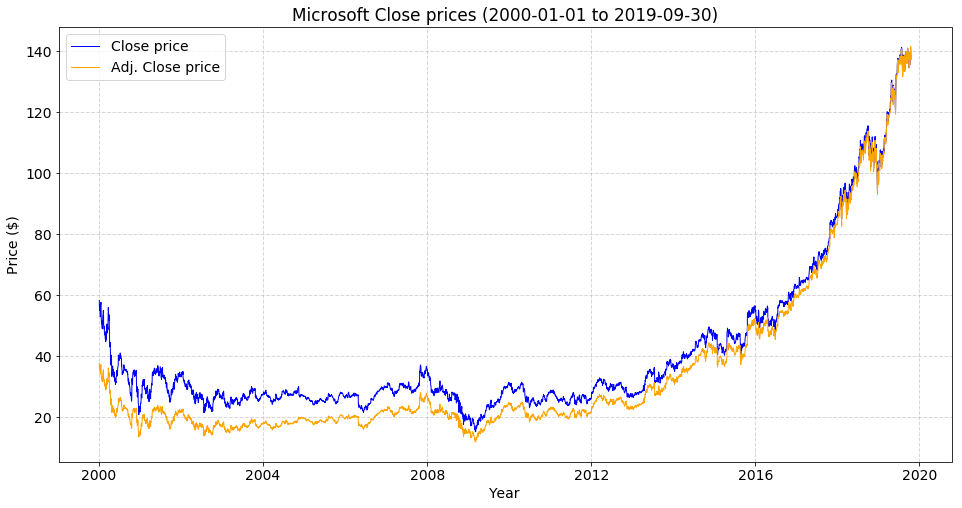

In [28]:
plt.figure(figsize = (16,8), linewidth=3, frameon = False)
plt.rcParams.update({'font.size': 14})
plt.plot(microsoft_prices["close"], color = "blue", label = "Close price", linewidth = 1)
plt.plot(microsoft_prices["adj_close"], color = "orange", label = "Adj. Close price", linewidth = 1)
#plt.plot(microsoft_prices["open"], color = "green", label = "Open price", linewidth = 1)
plt.title("Microsoft Close prices (2000-01-01 to 2019-09-30)")
plt.xlabel('Year')
plt.ylabel("Price ($)")
plt.legend(loc = "best")
plt.grid(b = True, which = "both", linestyle = '--', linewidth = 1, alpha = 0.5)
plt.show()

We can clearly see that there is an upward trend (especially after 2012) in the price of Microsoft stock over time. Due to the long period and the limitations of the plot above I cannot identify seasonality just by looking at the plot. But since this is not just guess work, I will apply some calculations to identify and remove trends and seasonality from my data.
#### To-do! Explain all about stationarity, and removing trends.
##### The idea - Make the data time independent (as much as possible). Make it stationary

In [17]:
#Explain adjusted close and drop it, use references to comments from the links
#microsoft_close_price_target = microsoft_prices.drop("close", axis = 1)
#microsoft_adj_close_price_target = microsoft_prices.drop("adj_close", axis = 1)
#microsoft_prices.sample()